### Step 6
#### a. The process of transforming the time series.

This section provides a broad overview of the time series transformation technique used in probabilistic graphic models for crude oil price forecasting. 

Data preprocessing process includes the following components: Data retrieval, data cleaning, data transformation, and data discretization.
These elements may be briefly discussed prior to the time series transformation process.

- Data retrieval: Data, comprising macro and microeconomic figures, were sourced from the Energy Information Administration (EIA) and the Federal Reserve Economic Data (FRED).
- Data cleaning: To manage missing values, eliminate outliers, and correct incorrect data formats using pandas, the raw data has to be cleaned.
- Data transformation: Data is divided into training, validation and test sets. The price of crude oil is entered into two new columns: one for the current price, and the other for the anticipated price of crude oil for the next month. With the help of this, we will be able to predict the price of oil and, consequently, decide whether to purchase or sell.
- Data discretisation: The information gathered is continuous and not categorical. Variables in belief networks have distinct states. Graphical models known as Hidden Markov Models to find these hidden states. Regime Detection is the technique of finding hidden states in time-series data.

#### Transformation

The following actions are involved in transforming the time series:

- The Hidden Markov Models will be used to identify regimes in time-series data. The difference in price will be computed in this step.  Since no data exists for the month prior, the initial value in this series will be null. 
- The spot price of crude oil can be used to identify bull, bear, and stagnant market regimes. It is going to be set to 1 if the price goes up for the following month and to 0 if it goes down. A lambda function can be used to achieve that.
- This binary sequence must be transformed into an array for the model's observed emission sequence. The Baum-Welch algorithm is used to learn the parameters.
- The aforementioned algorithm is used to partition the observed emission sequence into smaller arrays of length 32 or fewer, which are needed for the HMM implementation and employed in the training process.

#### b. Explaination on how the parameters are learned (Baum-Welch algorithm).

The model parameters can be estimated with the use of the forward-backward (Baum-Welch) approach. The model parameter set that optimizes the probability of the observation sequence cannot be found analytically or in a closed form. In order to enhance the probabilities of the observation sequence given the model, we reestimate the models using an iterative process. 

Given the model and the observation, let $\xi_{t}(i,j)$ represent the likelihood of being in state $i$ at time $t$ and in state $j$ at time $t+1$:

$$\xi_{t}(i,j) = P(q_{t} = i, q_{t+1}) = j/O,\lambda)$$ 

<p style="text-align: right;">(i)</p>

The variables $\xi_{t}(i,j)$ can be expressed as:

$$\xi_{t}(i,j) = \frac{P(q_{t} = i, q_{t+1} = j/O,\lambda)}{P(O/\lambda)}$$  
<p style="text-align: right;">(ii)</p><br>

$$=\frac{\alpha_{t}(i)a_{ij}b_{j}(o_{t+1})\beta_{t+1}(j)}{P(O/\lambda)}$$
<br>

$$=\frac{\alpha_{\tau}(i)a_{ij}b_{j}(o_{t+1})\beta_{t+1}(j)}{\sum_{i=1}^{N}\sum_{j=1}^{N}\alpha_{\tau}(i)a_{ij}b_{j}(o_{t+1})\beta_{t+1}(j)}$$  

<p style="text-align: right;">(iii)</p>

Furthermore, let $\gamma_{t}(i)$ denote the likelihood of being in state $i$ at time $t$, considering the model and the whole observation sequence.By adding up, this may be connected to $\xi_{t}(i,j)$ as follows:
$$\gamma_{t}(i) = \sum_{j=1}^{N}\xi_{t}(i,j)$$  

<p style="text-align: right;">(iv)</p>

One way to understand $\gamma_{t}(i)$ is as the expected number of visits or transitions from state $i$, which is obtained by adding $\gamma_{t}(i)$ across the time index $t$. The predicted number of transitions from state $i$ to state $j$ is also found by adding up $\xi_{t}(i,j)$ over $t$. The original state transition probabilities of the HMM can be reestimated by utilizing the notion of event occurrences. Transition probabilities for states A and output probability distribution for states B. One way to depict this would be:

$$\overline{\pi}_{j} = \gamma_{1}(i)$$  

<p style="text-align: right;">(v)</p>

> number of times in state $i$ at time $t = 1$

$$\overline{a}_{ij} = \frac{\sum_{t=1}^{T-1}\xi_{t}(i,j)}{\sum_{t=1}^{T-1}\gamma_{t}(i)}$$  

<p style="text-align: right;">(vi)</p>

> expected number of transitions from state $i$ to state $j$ / expected number of transitions from state $i$

$$\overline{b}_{j}(k) = \frac{\underset{o_{t=v_{k}}}{\sum_{t=1}^{T}\gamma_{t}(j)}}{\sum_{t=1}^{T}\gamma_{t}(j)}$$   

<p style="text-align: right;">(vii)</p>

> expected number of times in state $j$ and observing symbol $v_{k}$ /  expected number of times in state $j$

It can be demonstrated that either the initial model $\lambda$ defines a critical point of the likelihood function in which case $\overline{\lambda} = \lambda$, or the model $\overline{\lambda}$ is more likely than the model $\lambda$ in the sense that $P(O/\overline{\lambda} )>P(O/ \lambda)$. This is if the current model is defined as $\lambda = (A,B,\pi)$ and use (v), (vi), and (vii) to compute reestimated parameters $\overline{\lambda} = (\overline{A},\overline{B},\overline{\pi})$.The likelihood that the observation sequence will be seen from the model can be increased by carrying out the aforementioned approach across several iterations.

#### c. Finding the most likely sequence of hidden states (Viterbi algorithm).

Given a sequence of symbols, the Viterbi Algorithm (VA) determines the most probable state transition sequence within a state diagram. The VA is commonly used in digital communication systems to discover the most likely noiseless sequence given a series of symbols that have been distorted by noise, like additive white gaussian noise, and to detect symbols in channels with memory. The VA recursively determines which state each symbol in the noisy sequence is most likely to transition into.

The series of observable data points, such as the daily price of crude oil, may be used to estimate hidden states, or the underlying regimes or circumstances that affect the observed emissions but are not immediately visible to us (e.g., bullish or bearish or stagnant market conditions).
The components of a generalized viterbi algorithm are as follows:
- Initialization
- Recursion
- Termination

The series of hidden states that optimizes the likelihood of the detected emissions is the result of the Viterbi algorithm.

- The emission sequence for an example can be <code>[68, 72, 73, 71, 75]</code> (spot price of crude oil)
- The hidden states would bullish, bearish or stagnant markets.
- Transition probabilities can be <br>
<code>P(Bullish | Bullish) = 0.5, P(Bullish | Bearish) = 0.2, P(Bullish | Stagnant) = 0.3,
P(Bearish | Bullish) = 0.1, P(Bearish | Bearish) = 0.6, P(Bearish | Stagnant) = 0.3,
P(Stagnant | Bullish) = 0.1, P(Stagnant | Bearish) = 0.2, P(Stagnant | Stagnant) = 0.7.
</code>
- Emission probabilities can be <br>
<code>P(68 | Bullish) = 0.5, P(72 | Bullish) = 0.3, P(73 | Bullish) = 0.2,
P(71 | Bearish) = 0.2, P(75 | Bearish) = 0.5, P(69 | Bearish) = 0.3,
P(70 | Stagnant) = 0.4, P(72 | Stagnant) = 0.3, P(71 | Stagnant) = 0.3.
</code>

To run the Viterbi algorithm, the initial state probabilities can be used. After completing every step of the algorithm, it will backtrack and create the ideal sequence as the result. The ouput can look something like this:<br>
<code>[Bearish, Bullish, Stagnant, Stagnant, Bullish]</code>

### Step 7

The regime that is not immediately visible will be represented by hidden states. The study analyzes how indexing these hidden states based on their arithmetic mean might reveal their underlying significance.

- For the given observable emissions, the hidden markov model employs algorithms to find the sequences of hidden states.
- The algorithm then assigns hidden states that are used to index observed emissions.
- The arithmetic mean of the measured emissions for each hidden state should be determined. This gives an average observation for every state, represented by a center value.
- Identify the latent meaning of every hidden state using the computed means. As well as vice versa, greater means may represent states linked to higher measured values.

This can be best understood by using an example. The previous section's example, which utilized crude oil spot prices to sequence emissions, can be useful.

- Using the Viterbi approach, the most likely sequence for hidden states was obtained given the observed crude oil prices.
```
Observed emissions: [68, 72, 73, 71, 75, 70]
Hidden states: [Bearish, Bullish, Stagnant, Stagnant, Bullish, Bearish]
```
- It is now possible to index these hidden states with observed emissions. This may appear something like this:
```
Bearish: [68, 70]
Bullish: [72, 75]
Stagnant: [73, 71]
```
- Given these indexed states and emissions, the arithmetic mean may now be calculated.
```
mean(Bearish) = (68 + 70) / 2 = 69
mean(Bullish) = (72 + 75) / 2 = 73.5
mean(Stagnant)  = (73 + 71) / 2 = 72
```
***
Analyzing Hidden State Means to Determine Market Trends and Using Mean to Translate States 

- **Bearish** (Mean: 69):  A lower average price (e.g., 69) indicates a negative trend in the market. This is consistent with the standard definition for a bear market, which is one in which investors expect prices to continue falling. If the chart is always lingering around this level, it indicates that the market is not moving with much momentum and may be influenced by unfavorable news or economic conditions.
- **Bullish** (Mean: 73.5): Inversely, a higher average price, such as 73.5, suggests a bullish market environment. This is consistent with an optimistic market where investors anticipate price increases. Consider a pricing chart with a consistent upward trend; this indicates a market driven by optimism and maybe great business performance.
- **Stagnation** (Mean: 72): The average price of 72 indicates a sluggish market since it falls across both the bullish and bearish regions. But it's crucial to keep in mind that markets that are sluggish aren't completely still. Although there may be variations near this average, the general trend is unclear. Assume that the price chart is circling 72, with occasional  dips and increases. This might suggest that the market is looking for a trigger to end the standstill.

### Step 8-9
#### a. Implementing Hill Climb Search

To show the implementation of the Hill Climb search method, a New York taxi dataset is used. The dataset's objective is to understand realtionship of variables on the total amount of money the needs to be paid as the fare.

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
df = pd.read_parquet('yellow_tripdata_2024-01.parquet')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2.0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186.0,79.0,2.0,17.70,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0
1,1.0,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140.0,236.0,1.0,10.00,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0
2,1.0,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236.0,79.0,1.0,23.30,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0
3,1.0,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79.0,211.0,1.0,10.00,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0
4,1.0,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211.0,148.0,1.0,7.90,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2.0,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107.0,263.0,0.0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1.0,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114.0,236.0,0.0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2.0,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211.0,25.0,0.0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2.0,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107.0,13.0,0.0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN


In [5]:
df.dropna(inplace=True)

In [6]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2.0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186.0,79.0,2.0,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1.0,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140.0,236.0,1.0,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1.0,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236.0,79.0,1.0,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1.0,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79.0,211.0,1.0,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1.0,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211.0,148.0,1.0,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


Select a selected portion of the data to facilitate implementation.

In [11]:
# Select relevant columns for simplicity
columns_to_use = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount']
df = df[columns_to_use].dropna()

# Discretize continuous columns
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

df_discretized = df.copy()
df_discretized[columns_to_use] = discretizer.fit_transform(df[columns_to_use])

# Prepare the data for Hill Climb search
train_data = df_discretized.astype(int)

Hill Climbing is an iterative, greedy optimization technique that can be used to solve a wide range of issues. It begins with an initial, suboptimal solution to a problem and works to discover the optimal answer by progressively altering one component of the solution; if the modification results in a better solution, another incremental adjustment is made to the improved solution. This procedure is carried out repeatedly until no more advancements are possible.

In [12]:
# Initialize Hill Climb search
hc = HillClimbSearch(train_data)

print("Starting Hill Climb search...")
# Perform Hill Climb search
model = hc.estimate(scoring_method=K2Score(train_data))
print("Hill Climb search completed.")

print("Learned edges:", model.edges())

Starting Hill Climb search...


  0%|          | 0/1000000 [00:00<?, ?it/s]

Hill Climb search completed.
Learned edges: [('trip_distance', 'tip_amount'), ('trip_distance', 'total_amount'), ('fare_amount', 'total_amount'), ('fare_amount', 'tip_amount'), ('total_amount', 'tip_amount')]


NetworkX can additionally be used to express the model as a graph. With the help of the Hill Climb search, the model has been fitted and is now capable of drawing conclusions from forecasts.

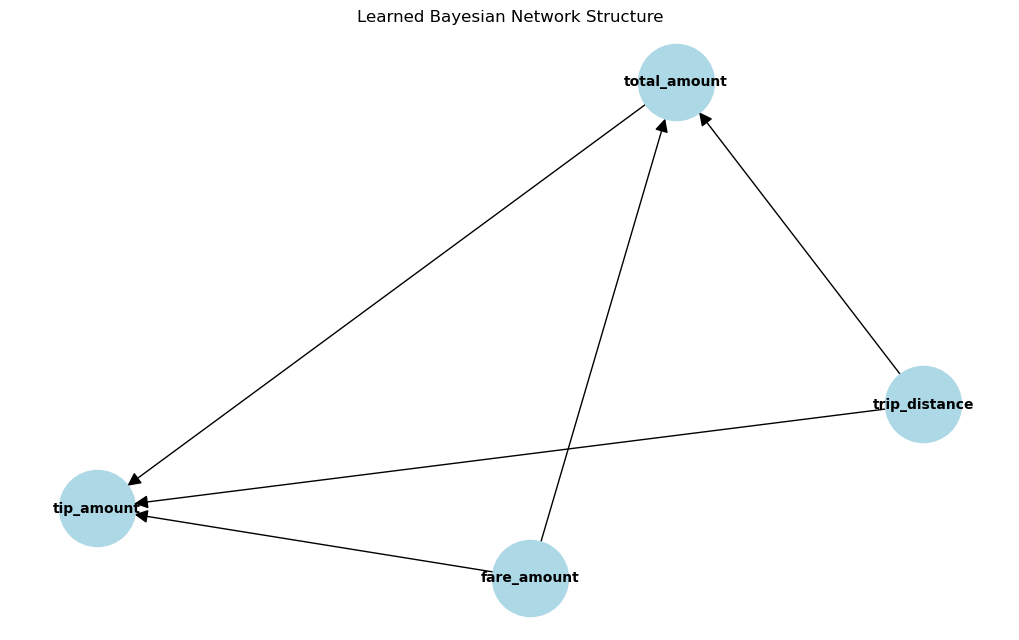

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a networkx graph from the learned model
G = nx.DiGraph(model.edges())

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
plt.title('Learned Bayesian Network Structure')
plt.show()


#### b. Interpretation:

- **trip_distance $\rightarrow$ tip_amount**: Given the additional time taken by the driver on longer trips, passengers may believe that larger payments are appropriate. Tips are frequently computed as a proportion of the total fare. Longer rides usually mean higher rates, which means that tips, as a percentage of the ticket, also tend to be larger.

- **trip_distance $\rightarrow$ total_amount**: Taxi prices are frequently computed by factoring in both the distance and the time of travel. Longer trips will always cost more because they cover a greater distance. The fare rises steadily with distance, thus the total sum grows with the number of miles driven. 

- **fare_amount $\rightarrow$ total_amount**: The primary component of the overall trip, which includes other charges, is the fare amount. The fare amount is increased by a variety of fees, taxes, and tips to arrive at the final price. Therefore, a rise in the fare will always increase the overall sum. The fare amount is a significant component in the final total as the total amount charged is the sum of the fare and any extra fees.

- **fare_amount $\rightarrow$ tip_amount**: A proportion of the fare is typically used to compute tips. As a result, when tipped based on percentage, a higher fare usually results in a bigger tip. Passengers may base their decision to leave a tip on the fare where higher fares may be associated with better levels of customer satisfaction, which in turn may lead to larger tips.  Tipping norms in many places indicate that a specific proportion of the fare should be tipped, thereby directly connecting the fare amount and the tip amount.

- **total_amount $\rightarrow$ tip_amount**: When choosing how much to tip, passengers may take the whole cost of the journey into account. Tips may increase proportionately with larger overall costs. Distance, time, and convenience can all be reflected in the total cost, which can represent the entire service experience. If passengers believe that the entire cost represents a better quality of service, they may leave larger tips. 

### References

- Sundaram, R. H. (2000). THE BAUM-WELCH ALGORITHM.
- Tao, C. (1992). A GENERALIZATION OF DISCRETE HIDDEN MARKOV MODEL AND OF VITERBI ALGORITHM. In Pattern Recognition (Vol. 25, Issue 11).
- Xiao, Y., He, Q., Veldkamp, B., & Liu, H. (2021). Exploring latent states of problem-solving competence using hidden Markov model on process data. Journal of Computer Assisted Learning, 37(5), 1232–1247. https://doi.org/10.1111/jcal.12559
- Rabiner, L. R. (1989). A Tutorial on Hidden Markov Models and Selected Applications in Speech Recognition.